In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import json
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
x_train = np.load('/content/drive/My Drive/data.npy')
x_train = np.repeat(x_train[..., np.newaxis], 1, -1)
y_train = np.load('/content/drive/My Drive/lable.npy')
y_train = keras.utils.to_categorical(y_train, num_classes = 2)
x_train = x_train.astype('float32')
x_train /= 255
x_train.shape

(305, 224, 224, 1)

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
latent_dim = 9408
encoder_inputs = keras.Input(shape=(224, 224, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 200704)       0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [ ]:
z_mean, z_log_var, z = encoder(x_train)

In [ ]:
z = np.array(z).reshape((305, 56, 56, 3))
z.shape

(305, 56, 56, 3)

In [ ]:
def fc():
  densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(56, 56, 3))
  model = Sequential()
  model.add(densenet)
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dense(2, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor='val_acc', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto')
  return model

In [ ]:
full_model = fc()

In [ ]:
full_model.fit(x = z, y = y_train, batch_size = 64, epochs = 100,  validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 10s 3s/step - loss: 0.7784 - accuracy: 0.6639 - val_loss: 0.3960 - val_accuracy: 0.9016
Epoch 2/100
4/4 [==============================] - 8s 2s/step - loss: 0.5541 - accuracy: 0.8525 - val_loss: 0.6580 - val_accuracy: 0.6885
Epoch 3/100
4/4 [==============================] - 8s 2s/step - loss: 0.2815 - accuracy: 0.9180 - val_loss: 0.3463 - val_accuracy: 0.9016
Epoch 4/100
4/4 [==============================] - 8s 2s/step - loss: 0.1159 - accuracy: 0.9426 - val_loss: 0.3949 - val_accuracy: 0.9016
Epoch 5/100
4/4 [==============================] - 8s 2s/step - loss: 0.1457 - accuracy: 0.9754 - val_loss: 0.4245 - val_accuracy: 0.9016
Epoch 6/100
4/4 [==============================] - 8s 2s/step - loss: 0.1912 - accuracy: 0.9467 - val_loss: 0.3876 - val_accuracy: 0.9016
Epoch 7/100
4/4 [==============================] - 8s 2s/step - loss: 0.0537 - accuracy: 0.9795 - val_loss: 0.5622 - val_accuracy: 0.9016
Epoch 8/100
4/4 [================

In [ ]:
full_model.save("full_model.h5")

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
test_img = image.load_img('/content/drive/My Drive/test_image.jpg', target_size=(224, 224))

In [ ]:
x = image.img_to_array(test_img)

In [ ]:
import matplotlib.pyplot as plt

[1]


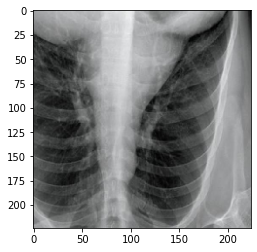

In [ ]:
plt.imshow(test_img)
img = np.expand_dims(x, axis=0)
result=full_model.predict_classes([img])
print(result)

In [ ]:
from google.colab import files
files.download('full_model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import json
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
x_test = np.load('/content/drive/My Drive/test_images.npy')
x_test = np.repeat(x_test[..., np.newaxis], 3, -1)
y_test = np.load('/content/drive/My Drive/test_labels.npy')
x_test = x_test.astype('float32')
x_test /= 255
x_test.shape

(98, 224, 224, 3)

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/My Drive/full_model.h5")

In [ ]:
result = model.predict_classes(x_test)
print(result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
